### 背景信息

在一个 Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

### 调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。


#### 1.我们的自变量是什么？因变量是什么？

自变量是 实际颜色和文字表述的颜色是否匹配。
因变量是 说出所有单词颜色所花费的时间（second）

#### 2.此任务的适当假设集是什么？你想执行什么类型的统计测试？为你的选择提供正当理由。

Nul hypothesis: 说出匹配组颜色所花费的时间(µ<sub>1</sub>)与不匹配组 (µ<sub>2</sub>)所花费的时间差别不显著。
$$ H_{0}: µ_{2} - µ_{1} = 0 $$
The alternative hypothesis：说出匹配组颜色所花费的时间(µ<sub>1</sub>)与不匹配组 (µ<sub>2</sub>)所花费的时间差别显著。
$$ H_{1}: µ_{2} - µ_{1} \neq 0 $$

如果确认了两个数据集是正态分布之后，我打算执行paired t-test。因为课程提供的样本数据是成对的，每个参与者分别进行了congruent与incongruent的测试，因此我们能够计算出每个样本的时间差。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

#### 3.报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from scipy.stats import probplot, ttest_1samp #导入数据分析库

data = pd.read_csv('stroopdata.csv')
data['diff'] = data['Incongruent'] - data['Congruent'] #两个样本的时间差
cong = data['Congruent']
incong = data['Incongruent']
diff = data['diff']
data.head()

,Congruent,Incongruent,diff
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


In [47]:
data.describe() #描述性统计量

,Congruent,Incongruent,diff
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


两个样本集的均值与中位数非常接近，很可能接近正态分布。两个样本集的最大最小值基本也在均值的两个标准差内。

#### 4.提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

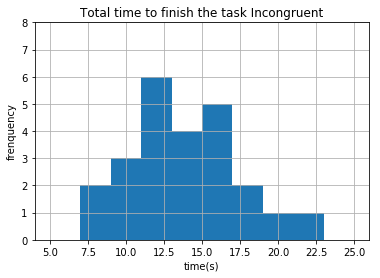

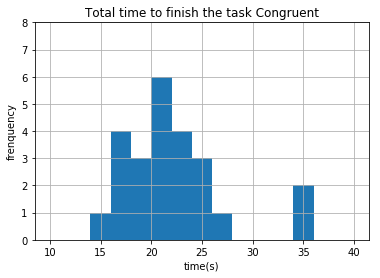

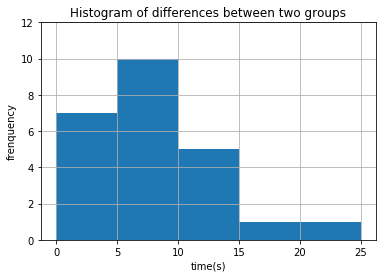

In [48]:
#绘制柱状图
plot.figure()
cong.hist(bins=10, range=(5,25), label='Incongruent', stacked=False)
plot.ylim((0,8))
plot.xlabel('time(s)')
plot.ylabel('frenquency')
plot.title('Total time to finish the task Incongruent')
plot.show()
plot.close()

incong.hist(bins=15, range=(10,40), label='Congruent', stacked=False)
plot.ylim((0,8))
plot.xlabel('time(s)')
plot.ylabel('frenquency')
plot.title('Total time to finish the task Congruent')
plot.show()
plot.close()

diff.hist(bins=5, range=(0,25), label='Difference', stacked=False)
plot.ylim((0,12))
plot.xlabel('time(s)')
plot.ylabel('frenquency')
plot.title('Histogram of differences between two groups')
plot.show()
plot.close()

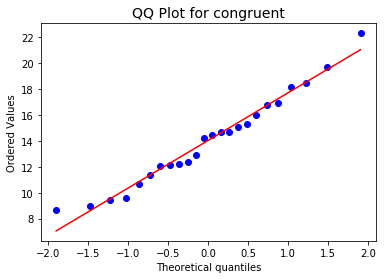

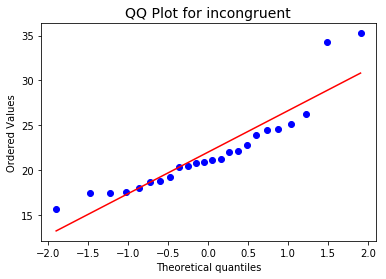

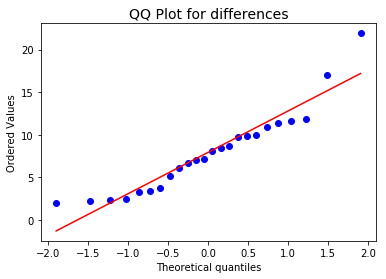

In [49]:
#绘制qq图
plot.figure()
array = probplot(cong, plot=plot)
plot.title('QQ Plot for congruent', fontsize=14)
plot.show()
plot.close()

array = probplot(incong, plot=plot)
plot.title('QQ Plot for incongruent', fontsize=14)
plot.show()
plot.close()

array = probplot(diff, plot=plot)
plot.title('QQ Plot for differences', fontsize=14)
plot.show()
plot.close()

由柱状图形状和QQ图的分析，可以认为两个样本数据集及其差组成的数据集都符合正态分布。

#### 5.现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与期望一致？

In [51]:
# t检验
dof = diff.count()-1 #自由度
tstat, pvalue = ttest_1samp(diff, popmean=0)
print('degrees of freedom is '+str(dof))
print('tt statistic: '+str(tstat))
print('p value: '+str(pvalue))

degrees of freedom is 23
tt statistic: 8.02070694411
p value: 4.10300058571e-08


置信水平是99.9%，关键统计值是3.768。因此拒绝H<sub>0。

结论：匹配组颜色所花费的时间(µ<sub>1</sub>)与不匹配组 (µ<sub>2</sub>)所花费的时间的差别显著。不匹配组所花费的时间长于匹配组。
检验结果与我的期望一致。

#### 6.可选：你觉得导致所观察到的效应的原因是什么？你是否能想到会取得类似效应的替代或类似任务？进行一些调查研究将有助于你思考这两个问题！

原因可能在于人类大脑对于两种信息（语义，颜色）处理的反应速度/熟练程度是不一样的。因此在两种信息不一致时，需要更多处理时间？
可以使用其他不同信息组进行试验，比如（语义，体积），判断文字（大 中 小）是否正确对应三种体积；或是（数字，数量），判断数字是否对应正确的数量。